In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
#Import data
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('churn_prediction.xlsx')

Saving churn_prediction.xlsx to churn_prediction (5).xlsx


In [ ]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


## **Overview the data:**

In [ ]:
# Check info & missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
#Remove unnecessary columns
##CustomerID is just a unique identifier to each user and has nothing to do with predicting if user churns or not.
df.drop(columns="CustomerID", inplace=True)

In [ ]:
# Check imbalanced:
label_ratio = df['Churn'].value_counts(normalize=True)
label_ratio

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

The ration of label 1 on total is 16% &#8594; We can continue with the EDA and ML model

In [ ]:
# Check duplicated values:
df.duplicated().unique()

array([False,  True])

In [ ]:
# Check null values:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
#Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## **Define type of data**

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [ ]:
obj_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(exclude=['object'])

In [ ]:
num_cols.nunique()

Churn                             2
Tenure                           36
CityTier                          3
WarehouseToHome                  34
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
SatisfactionScore                 5
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

:As showing the unique values of each numeric columns, there's columns have low unique values (less than 10 values) &#8594; There's column has dtype = numeric but have category meaning.

In [ ]:
for col in num_cols:
    print(col, df[col].unique())

Churn [1 0]
Tenure [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
CityTier [3 1 2]
WarehouseToHome [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
HourSpendOnApp [3. 2. 1. 0. 4. 5.]
NumberOfDeviceRegistered [3 4 5 2 1 6]
SatisfactionScore [2 3 5 4 1]
NumberOfAddress [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Complain [1 0]
OrderAmountHikeFromlastYear [11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21. 25. 26.]
CouponUsed [ 1.  0.  4.  2.  9.  6. 11.  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]
OrderCount [ 1.  6.  2. 15.  4.  7.  3.  9. 11.  5. 12. 10.  8. 13. 14. 16.]
DaySinceLastOrder [ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. 13. 12. 17. 16. 14.
 30. 46. 18. 31.]
CashbackAmount [159.93 120.9  120.28 ... 173.77 287.91 173.78]


In [ ]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
    if df2[col].dtype == 'int':
        df2[col] = df2[col].astype(str)

df2.dtypes

Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
for col in obj_cols:
    print(col, df[col].unique())

PreferredLoginDevice ['Mobile Phone' 'Computer']
PreferredPaymentMode ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender ['Female' 'Male']
PreferedOrderCat ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus ['Single' 'Divorced' 'Married']


In [ ]:
#In PreferredLoginDevice, Mobile Phone and Phone can be merged into one category
##In PreferredPaymentMode, Credit Card and CC can be merged into one category
###In PreferedOrderCat, Mobile Phone and Phone can be merged into one category
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC', 'COD'], ['Credit Card', 'Cash on Delivery'] )
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [ ]:
cat_data = df2.select_dtypes(include=['object']).drop(columns=['Churn'])
num_data = df2.select_dtypes(exclude=['object'])

In [ ]:
for col in cat_data:
    print(col, df2[col].unique())

PreferredLoginDevice ['Mobile Phone' 'Computer']
CityTier ['3' '1' '2']
PreferredPaymentMode ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender ['Female' 'Male']
NumberOfDeviceRegistered ['3' '4' '5' '2' '1' '6']
PreferedOrderCat ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
SatisfactionScore ['2' '3' '5' '4' '1']
MaritalStatus ['Single' 'Divorced' 'Married']
NumberOfAddress ['9' '7' '6' '8' '3' '2' '4' '10' '1' '5' '19' '21' '11' '20' '22']
Complain ['1' '0']


## **Start Feature Engineering & EDA**

#### Check distribution (density) of some quantity features

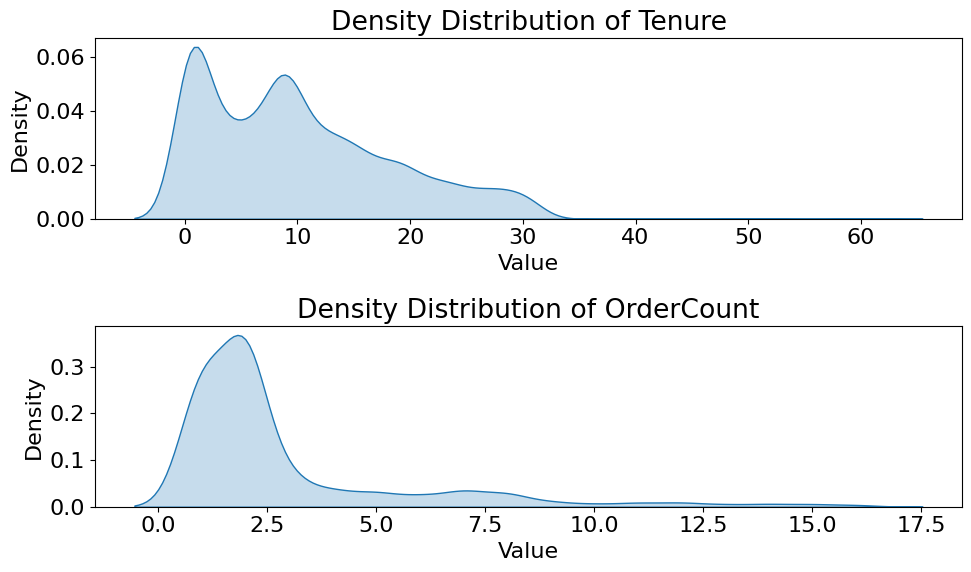

In [ ]:
cols = ['Tenure','OrderCount']

plt.figure(figsize=(10, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.kdeplot(num_cols[col], shade=True)
    plt.title(f'Density Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

#### Check correlation:

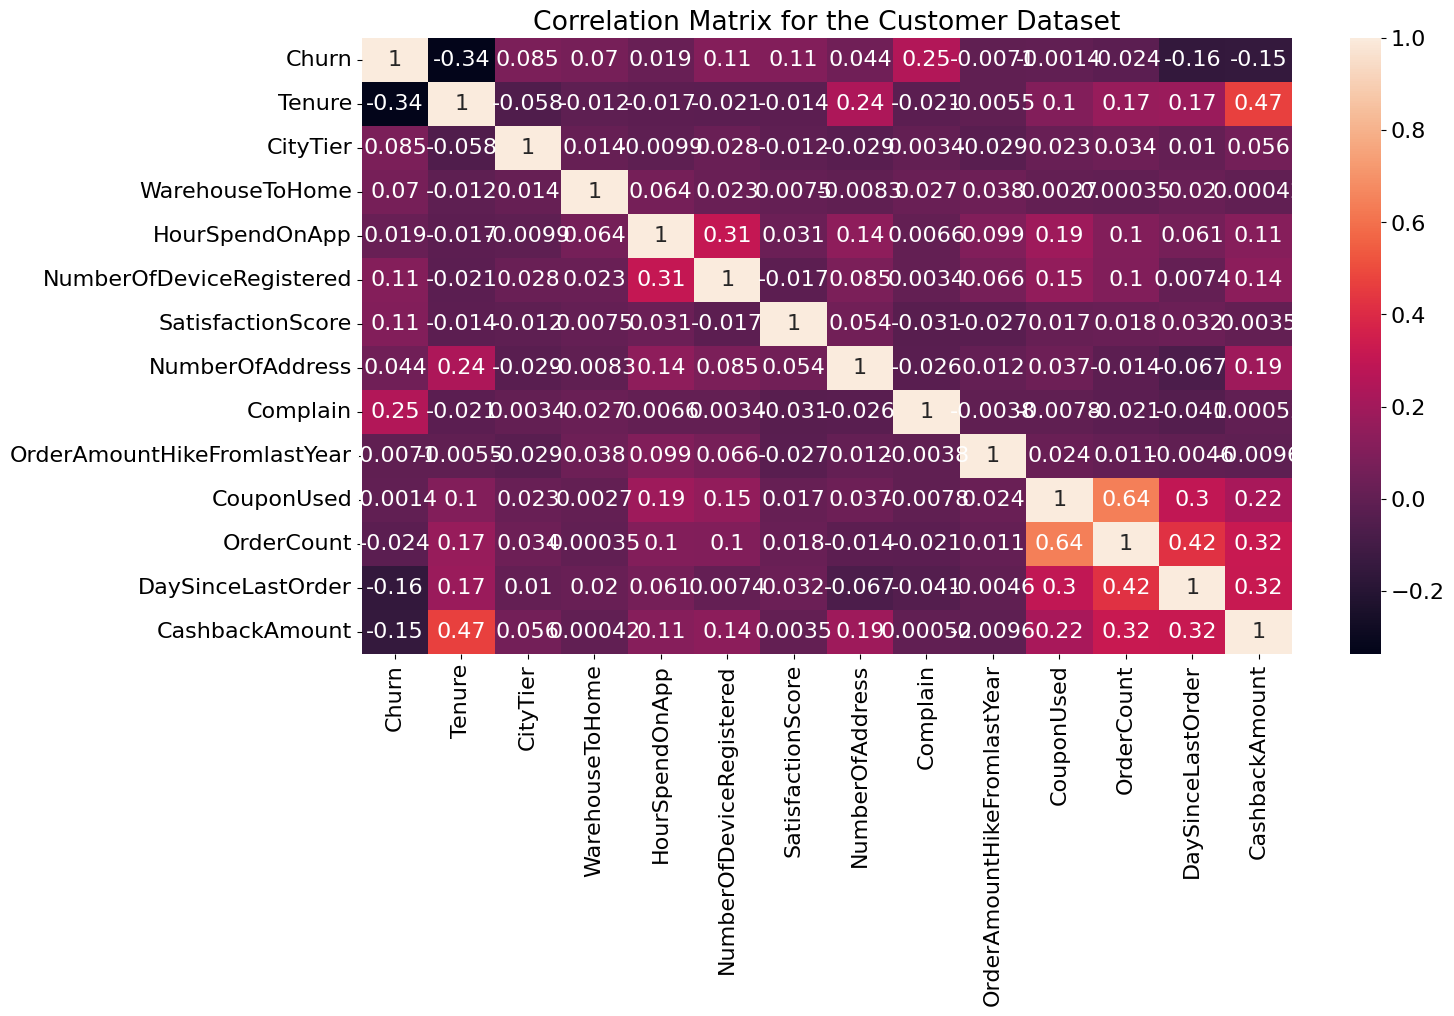

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

Based on correlation heatmap, we see the Complain has
high correlation with Churn

<Axes: xlabel='Churn', ylabel='Complain'>

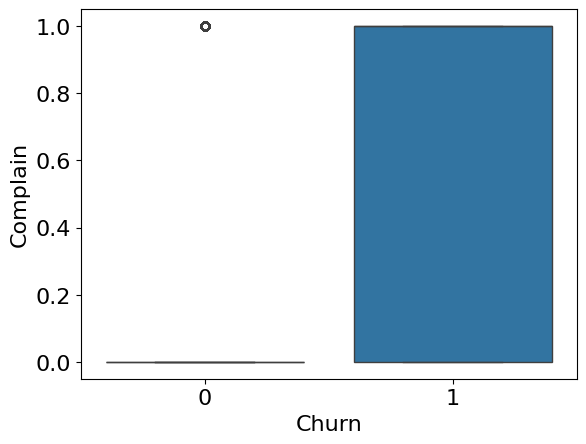

In [ ]:
sns.boxplot(data=df, x='Churn',y='Complain')

### Category Features:

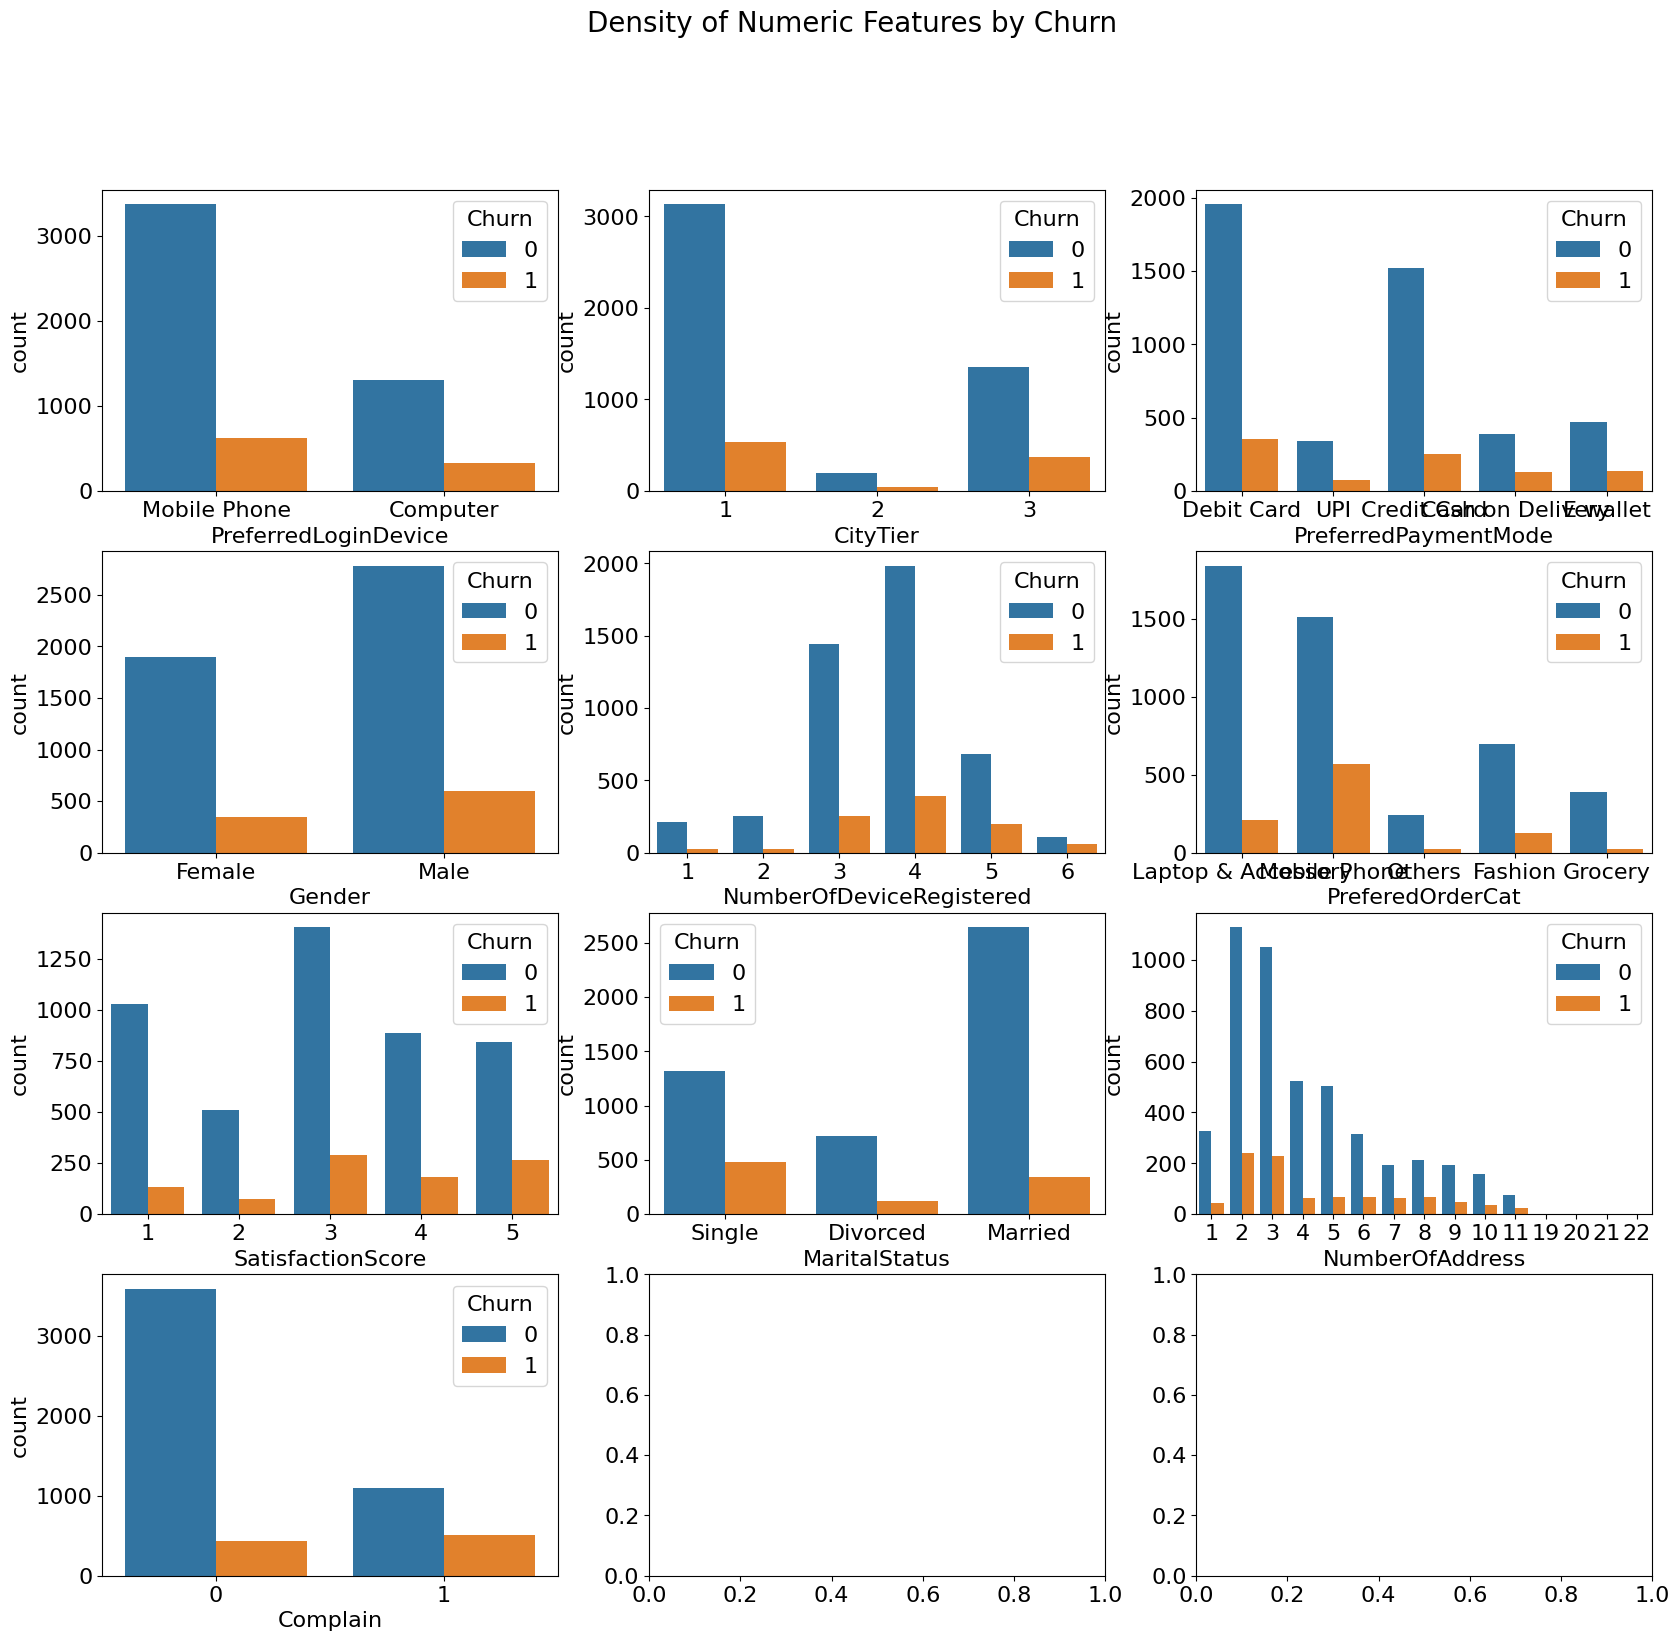

In [ ]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for col, subplot in zip(cat_data, ax.flatten()):
    sns.countplot(x=df[col], hue=df.Churn, ax=subplot)

plt.show()

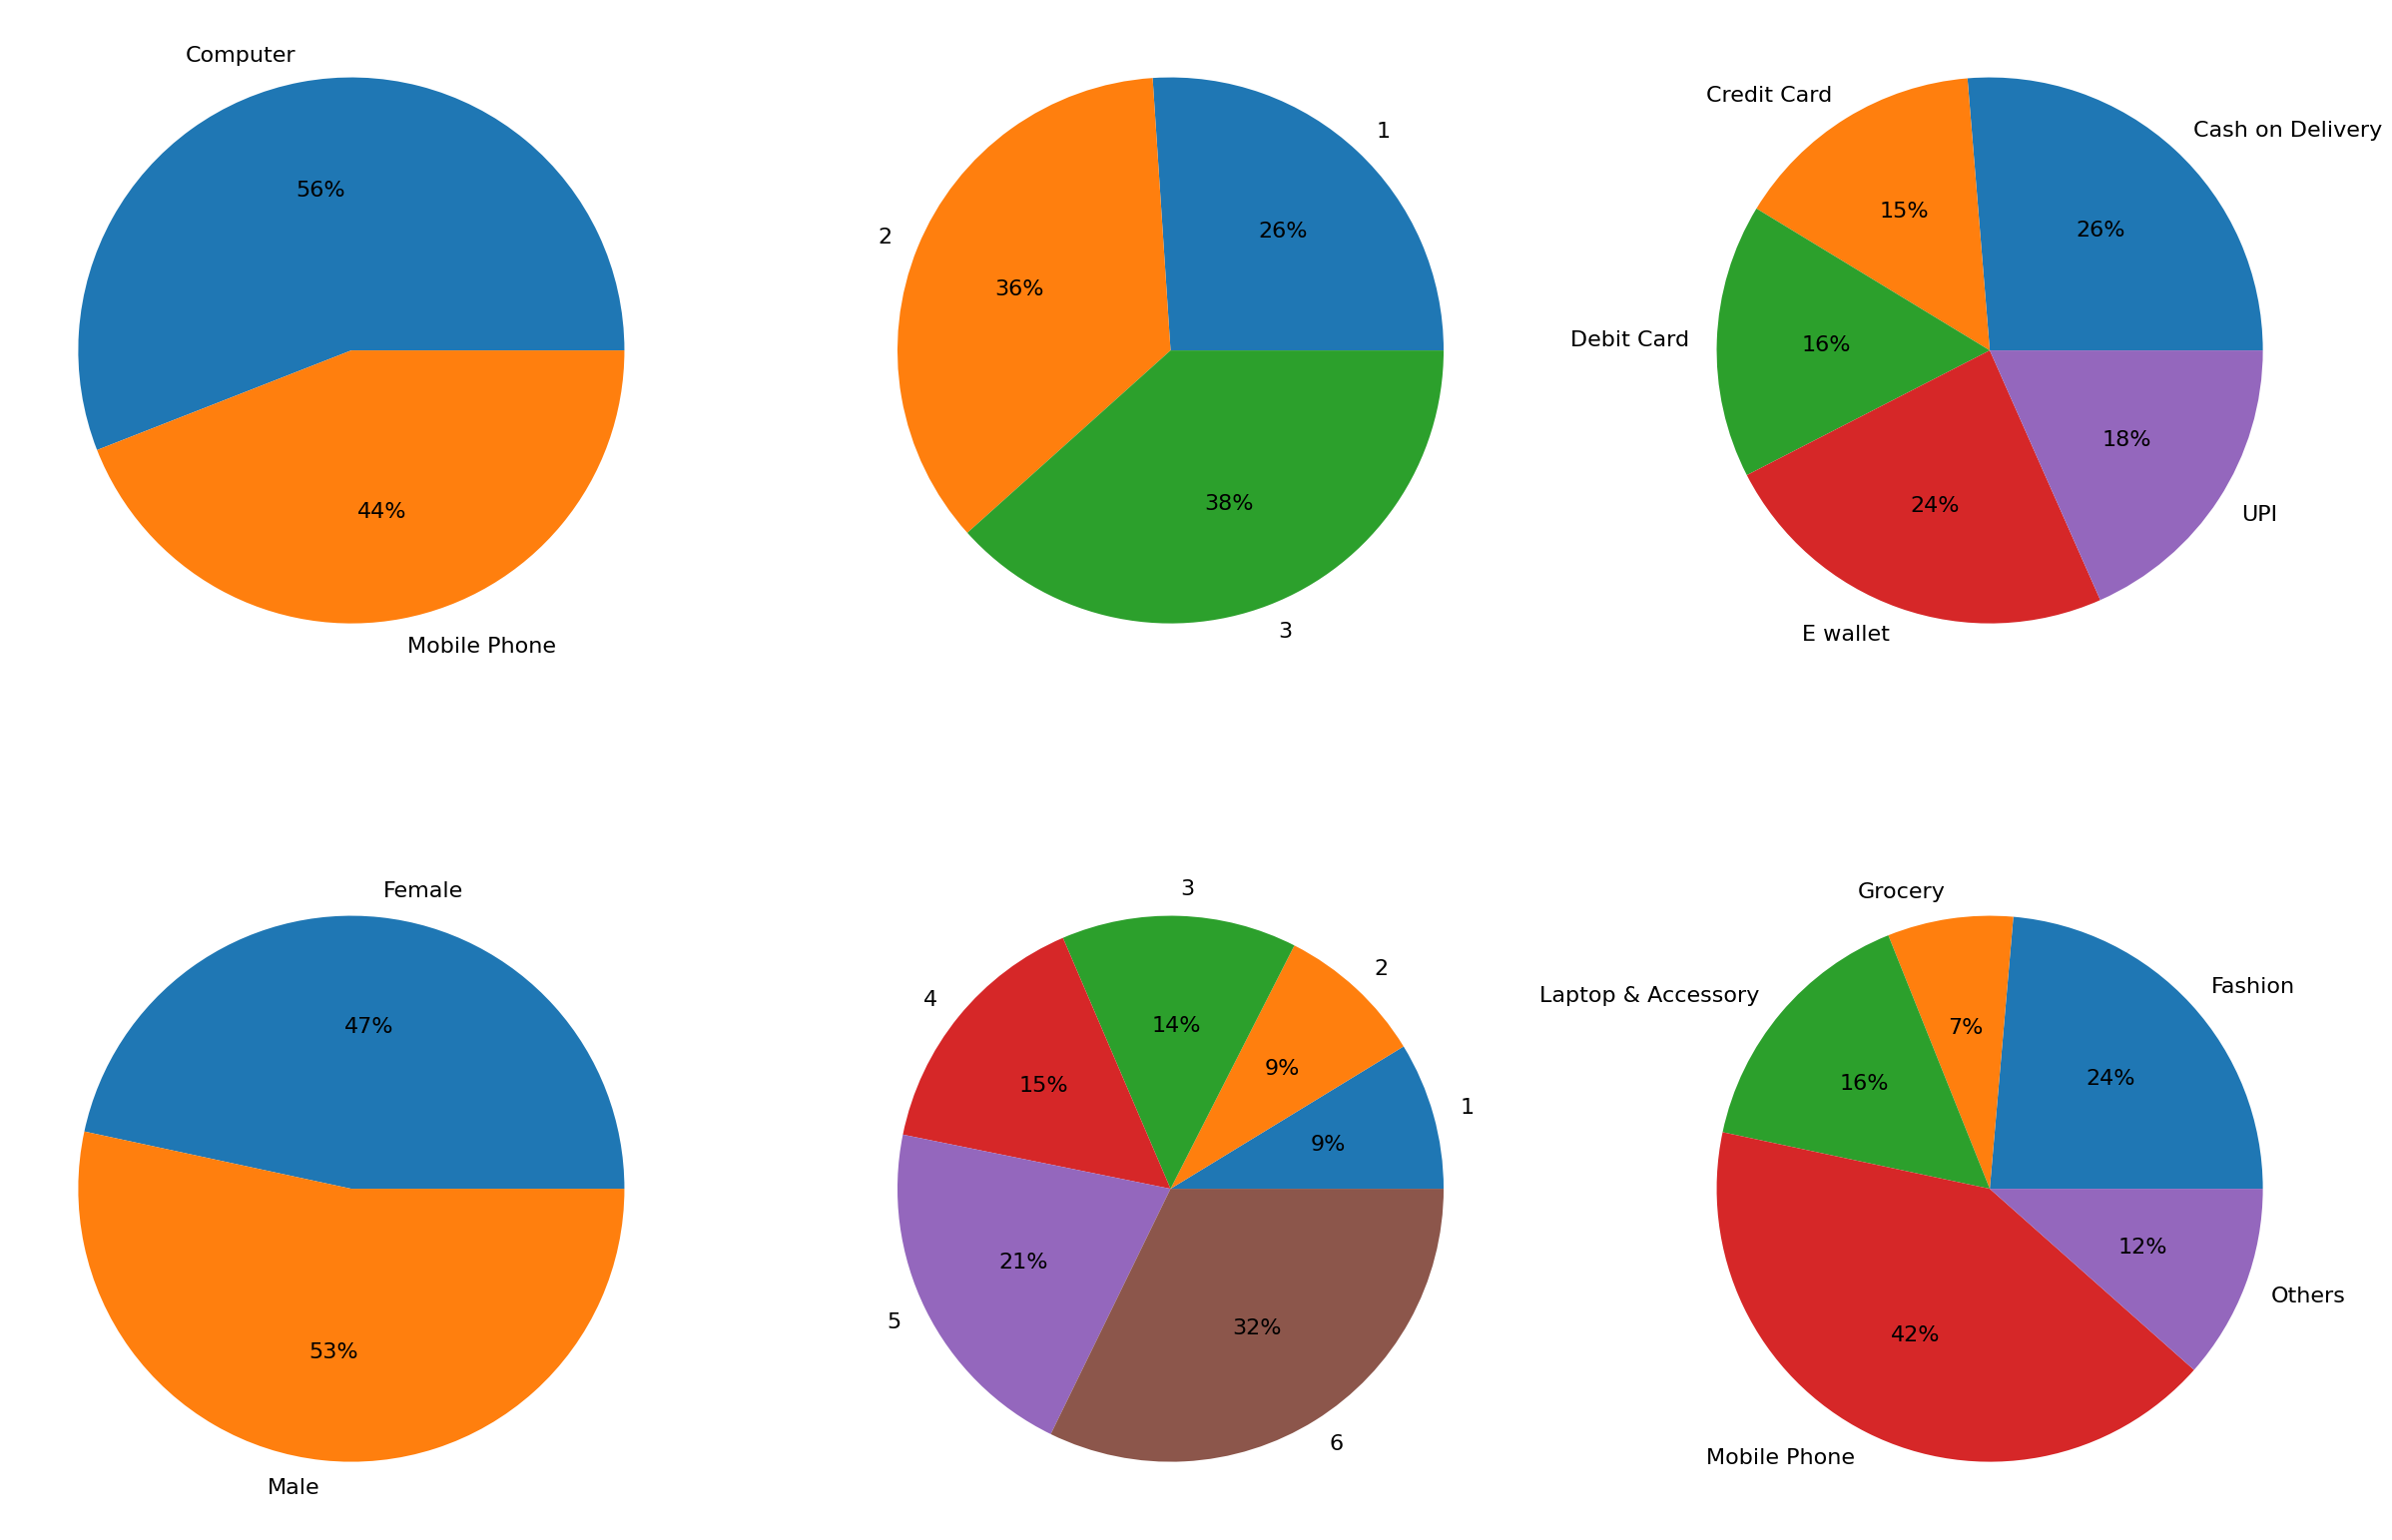

In [ ]:
#To make the inferences more insightful we can find out the per cent churn contributed by each category for each variable.
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '16'
for col,subplot in zip(cat_data, ax.flatten()):
    #calculate percent churn
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})

## **Feature Transforming**

###Encoding

In [ ]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
****************************************
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
****************************************
Gender
Male      3384
Female    2246
Name: count, dtype: int64
****************************************
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
****************************************
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
****************************************


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Encode for obj_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(3)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28


###Handling Imbalanced Data

In [ ]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [ ]:
x_over.shape, y_over.shape

((9364, 18), (9364,))

###Normalization

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# divided into train and test data
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [ ]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

## **Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [ ]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [ ]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [ ]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7607567897467196
Test Score: 0.7640569395017793
Acc Train: 0.7607567897467196
Acc Test: 0.7640569395017793
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.8719865730851388
Test Score: 0.8338078291814947
Acc Train: 0.8719865730851388
Acc Test: 0.8338078291814947
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.7459074733096085
Acc Train: 1.0
Acc Test: 0.7459074733096085
                                                            
************************************************************
                                                            
Using m

In [ ]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.760757,0.764057
Support Vector Machine,0.871987,0.833808
Decision Tree,1.000000,0.745907
Random Forest,1.000000,0.847687
XGBClassifier,1.000000,0.814591
AdaBoostClassifier,0.880836,0.740214


In [ ]:
!pip install mlxtend

## **Evaluation**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay, confusion_matrix

Accuracy = 0.7640569395017793
ROC Area under Curve = 0.7642728579251665
              precision    recall  f1-score   support

           0    0.72834   0.84011   0.78025      1401
           1    0.81240   0.68843   0.74529      1409

    accuracy                        0.76406      2810
   macro avg    0.77037   0.76427   0.76277      2810
weighted avg    0.77049   0.76406   0.76272      2810

**********************************************************************


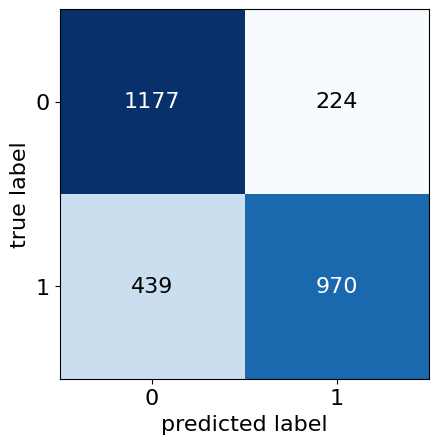

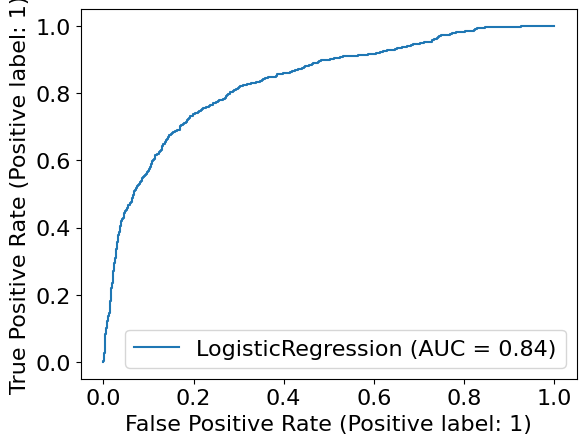

In [ ]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.7359430604982207
ROC Area under Curve = 0.7360685792212701
              precision    recall  f1-score   support

           0    0.71578   0.78016   0.74658      1401
           1    0.75994   0.69198   0.72437      1409

    accuracy                        0.73594      2810
   macro avg    0.73786   0.73607   0.73548      2810
weighted avg    0.73792   0.73594   0.73544      2810



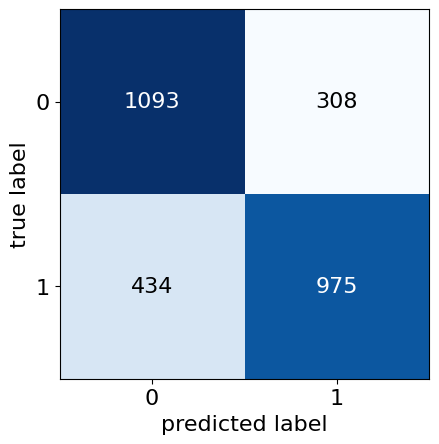

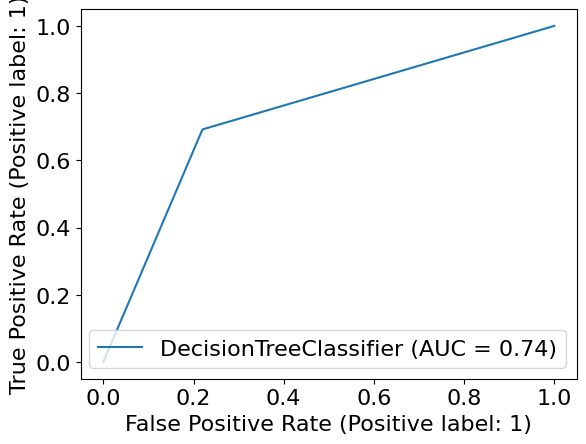

In [ ]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Training time: 0.924 seconds
Average prediction time per customer: 0.000015 seconds
Accuracy = 0.8601423487544484
ROC Area under Curve = 0.8601908603253583
              precision    recall  f1-score   support

           0    0.84759   0.87723   0.86215      1401
           1    0.87353   0.84315   0.85807      1409

    accuracy                        0.86014      2810
   macro avg    0.86056   0.86019   0.86011      2810
weighted avg    0.86059   0.86014   0.86011      2810



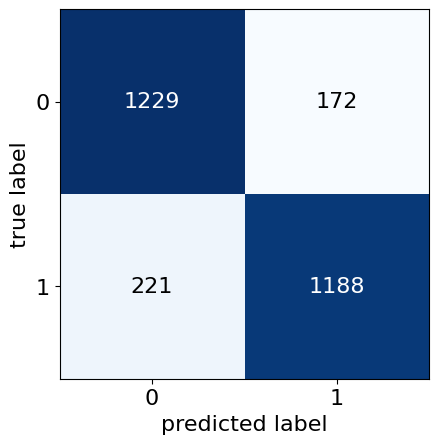

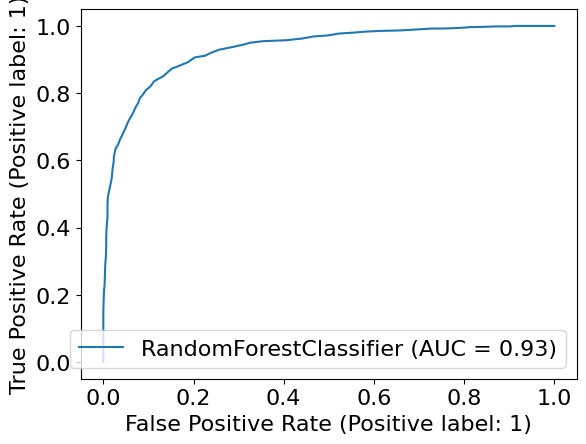

In [ ]:
# random forest
import time
start=time.time()

model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)

end=time.time()
training_time=end-start
print(f'Training time: {training_time:.3f} seconds')

pred_start=time.time()
y_pred = model.predict(x_test_scaled)
pred_end = time.time()
pred_time = (pred_end-pred_start)/len(x_test_scaled)
print(f'Average prediction time per customer: {pred_time:.6f} seconds')

accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

## **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

#  RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [ ]:
#create hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

In [ ]:
# Use the best cv score and the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# print the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#fit the object to the data
grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

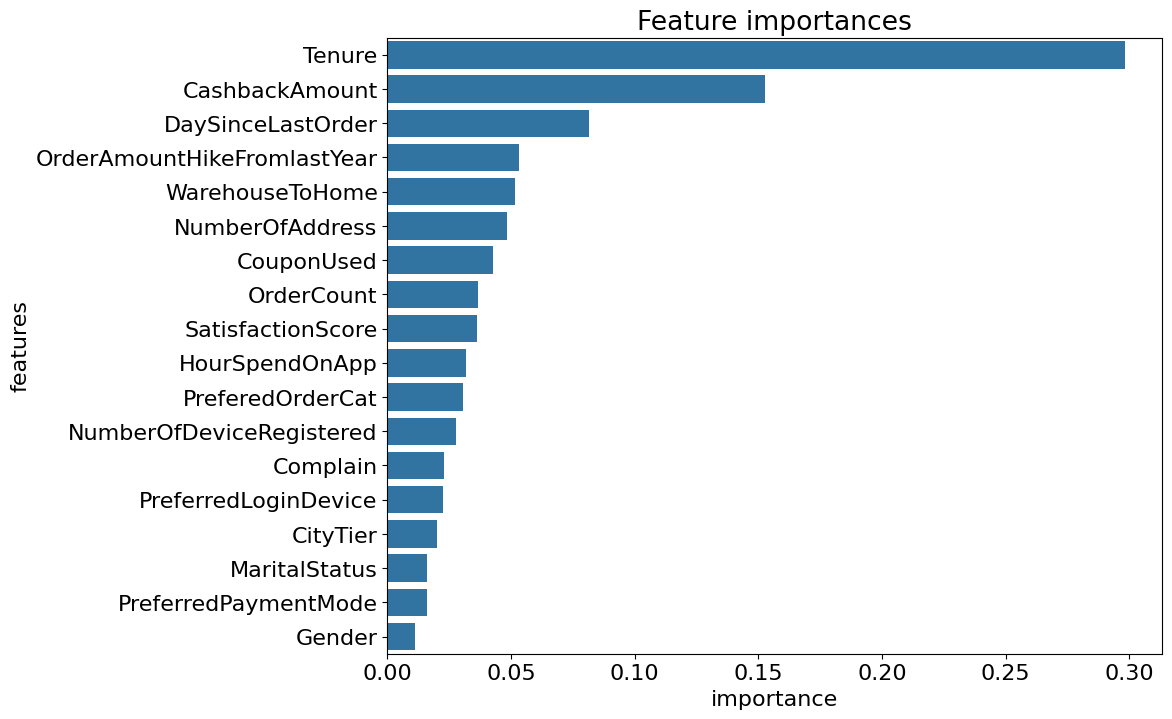

In [ ]:
#feature importance
feature_importance=pd.DataFrame(grid_search.best_estimator_[2].feature_importances_, columns=['importance'])
feature_importance['features'] = x_train.columns

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='features', data=feature_importance.sort_values(by='importance', ascending=False))
plt.title('Feature importances')
plt.show()

## **Conclusion**

What are the patterns/behavior of churned users?
1. The biggest particular influences for eliminating customer e-commerce services are “Complain”, “MaterialStatus”, “SatisfactionScore”, “PreferedOrderCat”, “DaySinceLastOrder”, “CashbackAmount” and “Tenure”.
2. Customers who stay with the service tend to have a longer tenure, while those who leave (churn) typically do so after a shorter duration.
3. Customers who prefer using a computer for login have a slightly higher churn rate compared to those who prefer mobile phones.
4. Male customers have a slightly higher churn rate compared to female customers
5. Single customers have a significantly higher churn rate compared to married  and divorced customers.
6. Surprisingly, the average satisfaction score is higher for customers who churned compared to those who didn’t. This might suggest that factors other than satisfaction scores are influencing the decision to churn, or that the satisfaction scores may not fully capture the customer’s experience or likelihood to remain with the service.


What are your suggestions to the
company to reduce churned users.

1. Should consider that the higher percentage are males increasing the products that grap the males interest and so on
2. May be the comapny should consider taking care of the products that suits the single and the married customers as the single are more likly to churn
3. The company should think of another technique other than satisfaction score or complaining may be a hot line to recive the complains to get fast results or provied regular phone calls to recive feedback from the customers
4. The company should check the mobile version of the store to see if there is any problem with the ui/ux
5. Once the customer has reached 12%-15% orderamount the company should consider focusing more on grap their attention with the products they like
6. For customers who have just bought electronic goods, cross-selling can be done by offering electronic accessories, such as keyboards, mice, etc.


